## 1. TV, halftime shows, and the Big Game




In [81]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Import Data from Google Drive

In [82]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [83]:
# Read a csv file into DataFrame
super_bowls = pd.read_csv('/content/gdrive/My Drive/Analyzing TV Data/super_bowls.csv')
tv = pd.read_csv('/content/gdrive/My Drive/Analyzing TV Data/tv.csv')
halftime_musicians = pd.read_csv('/content/gdrive/My Drive/Analyzing TV Data/halftime_musicians.csv')

## 3. Display the first five rows of each DataFrame

In [84]:
super_bowls.head()

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


In [85]:
tv.head()

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


In [86]:
halftime_musicians.head()

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


## 4. Taking note of dataset issues

In [87]:
tv.info()

print('\n')

tv.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   super_bowl        53 non-null     int64  
 1   network           53 non-null     object 
 2   avg_us_viewers    53 non-null     int64  
 3   total_us_viewers  15 non-null     float64
 4   rating_household  53 non-null     float64
 5   share_household   53 non-null     int64  
 6   rating_18_49      15 non-null     float64
 7   share_18_49       6 non-null      float64
 8   ad_cost           53 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.9+ KB




(53, 9)

In [88]:
halftime_musicians.info()

print('\n')

halftime_musicians.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   super_bowl  134 non-null    int64  
 1   musician    134 non-null    object 
 2   num_songs   88 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB




(134, 3)

In [89]:
super_bowls.info()

print('\n')

super_bowls.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            52 non-null     object
 1   super_bowl      52 non-null     int64 
 2   venue           52 non-null     object
 3   city            52 non-null     object
 4   state           52 non-null     object
 5   attendance      52 non-null     int64 
 6   team_winner     52 non-null     object
 7   winning_pts     52 non-null     int64 
 8   qb_winner_1     52 non-null     object
 9   qb_winner_2     2 non-null      object
 10  coach_winner    52 non-null     object
 11  team_loser      52 non-null     object
 12  losing_pts      52 non-null     int64 
 13  qb_loser_1      52 non-null     object
 14  qb_loser_2      3 non-null      object
 15  coach_loser     52 non-null     object
 16  combined_pts    52 non-null     int64 
 17  difference_pts  52 non-null     int64 
dtypes: int64(6),

(52, 18)

## 5. Combined points distribution

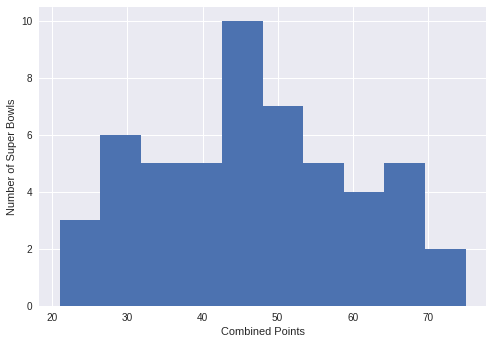

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
5,2013-02-03,47,Mercedes-Benz Superdome,New Orleans,Louisiana,71024,Baltimore Ravens,34,Joe Flacco,NaN,John Harbaugh,San Francisco 49ers,31,Colin Kaepernick,NaN,Jim Harbaugh,65,3
7,2011-02-06,45,Cowboys Stadium,Arlington,Texas,103219,Green Bay Packers,31,Aaron Rodgers,NaN,Mike McCarthy,Pittsburgh Steelers,25,Ben Roethlisberger,NaN,Mike Tomlin,56,6
14,2004-02-01,38,Reliant Stadium,Houston,Texas,71525,New England Patriots,32,Tom Brady,NaN,Bill Belichick,Carolina Panthers,29,Jake Delhomme,NaN,John Fox,61,3
15,2003-01-26,37,Qualcomm Stadium,San Diego,California,67603,Tampa Bay Buccaneers,48,Brad Johnson,NaN,Jon Gruden,Oakland Raiders,21,Rich Gannon,NaN,Bill Callahan,69,27
19,1999-01-31,33,Pro Player Stadium,Miami Gardens,Florida,74803,Denver Broncos,34,John Elway,NaN,Mike Shanahan,Atlanta Falcons,19,Chris Chandler,NaN,Dan Reeves,53,15
20,1998-01-25,32,Qualcomm Stadium,San Diego,California,68912,Denver Broncos,31,John Elway,NaN,Mike Shanahan,Green Bay Packers,24,Brett Favre,NaN,Mike Holmgren,55,7


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts


In [90]:
%matplotlib inline
plt.style.use('seaborn')

# Plot a histogram of combined points
plt.hist(super_bowls['combined_pts'])
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.show()

# Display the closest game(s) and biggest blowouts
display(super_bowls[super_bowls['combined_pts'] > 50])
display(super_bowls[super_bowls['combined_pts'] < 20])

## 6. Point difference distribution

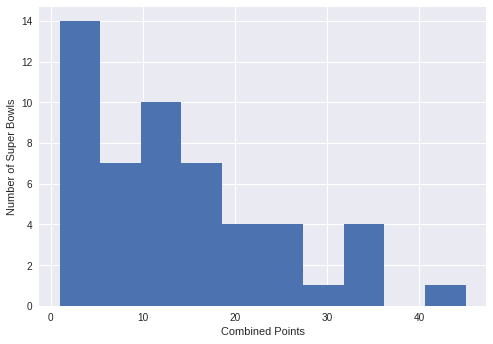

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
12,2006-02-05,40,Ford Field,Detroit,Michigan,68206,Pittsburgh Steelers,21,Ben Roethlisberger,NaN,Bill Cowher,Seattle Seahawks,10,Matt Hasselbeck,NaN,Mike Holmgren,31,11
17,2001-01-28,35,Raymond James Stadium,Tampa,Florida,71921,Baltimore Ravens,34,Trent Dilfer,NaN,Brian Billick,New York Giants,7,Kerry Collins,NaN,Jim Fassel,41,27
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
30,1988-01-31,22,Jack Murphy Stadium,San Diego,California,73302,Washington Redskins,42,Doug Williams,NaN,Joe Gibbs,Denver Broncos,10,John Elway,NaN,Dan Reeves,52,32
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36
34,1984-01-22,18,Tampa Stadium,Tampa,Florida,72920,Los Angeles Raiders,38,Jim Plunkett,NaN,Tom Flores,Washington Redskins,9,Joe Theismann,NaN,Joe Gibbs,47,29
37,1981-01-25,15,Louisiana Superdome,New Orleans,Louisiana,76135,Oakland Raiders,27,Jim Plunkett,NaN,Tom Flores,Philadelphia Eagles,10,Ron Jaworski,NaN,Dick Vermeil,37,17
40,1978-01-15,12,Superdome,New Orleans,Louisiana,76400,Dallas Cowboys,27,Roger Staubach,NaN,Tom Landry,Denver Broncos,10,Craig Morton,NaN,Red Miller,37,17


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8


In [91]:
# Plot a histogram of point differences
plt.hist(super_bowls.difference_pts)
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.show()

# Displays the losses with the smallest and largest points
display(super_bowls[super_bowls['losing_pts'] <= 10])
display(super_bowls[super_bowls['losing_pts'] == 33])

## 7. Do blowouts translate to lost viewers?

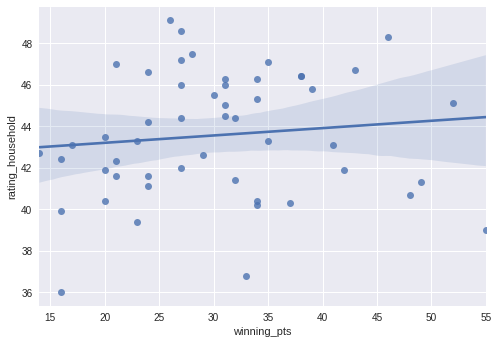

In [92]:
# filtering out super_bowl because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')
# Create a scatter plot with a linear regression model fit
sns.regplot(data=games_tv, x='winning_pts', y='rating_household')

## 8. Viewership and the ad industry over time

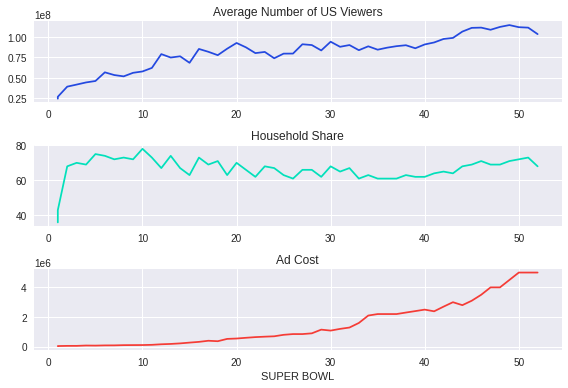

In [93]:
# Create a figure with 3x1 subplot and activate the top subplot
plt.subplot(3, 1, 1)
plt.plot(tv.super_bowl, tv.avg_us_viewers, color='#2449E0')
plt.title('Average Number of US Viewers')

# Activate the middle subplot
plt.subplot(3, 1, 2)
plt.plot(tv.super_bowl, tv.share_household, '#02E0BB')
plt.title('Household Share')

# Activate the bottom subplot
plt.subplot(3, 1, 3)
plt.plot(tv.super_bowl, tv.ad_cost, '#F53C36')
plt.title('Ad Cost')
print('\n')
plt.xlabel('SUPER BOWL')

# Improve the spacing between subplots
plt.tight_layout()

## 9. Halftime shows weren't always this great

In [94]:
# Display several number of songs musicians for Super Bowls
display(halftime_musicians[halftime_musicians.super_bowl <= 17])

,super_bowl,musician,num_songs
100,17,Los Angeles Unified School District All City H...,NaN
101,16,Up with People,NaN
102,15,The Human Jukebox,NaN
103,15,Helen O'Connell,NaN
104,14,Up with People,NaN
105,14,Grambling State University Tiger Marching Band,NaN
106,13,Ken Hamilton,NaN
107,13,Gramacks,NaN
108,12,Tyler Junior College Apache Band,NaN
109,12,Pete Fountain,NaN


## 10. Who has the most halftime show appearances?

In [95]:
# Count halftime show appearances for each musician and sort them from most to least
halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

# Display musicians with more than one halftime show appearance
halftime_appearances[halftime_appearances['super_bowl'] > 1]

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


## 11. Who performed the most songs in a halftime show?

In [96]:
# Filter out most marching bands
no_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

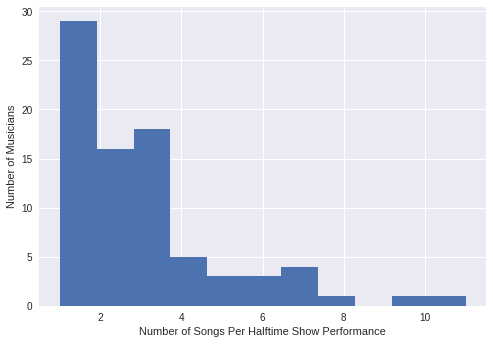

In [97]:
# Plot a histogram of number of songs per performance
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins=most_songs)
plt.xlabel('Number of Songs Per Halftime Show Performance')
plt.ylabel('Number of Musicians')
plt.show()

In [98]:
# Sort the non-band musicians by number of songs per appearance
no_bands = no_bands.sort_values('num_songs', ascending=False)
display(no_bands.head(15))

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0
